In [1]:
# !pip install pycaret

In [2]:
import pandas as pd
import seaborn as sns

from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("new_train_v4.csv")
train = train.drop('index', axis=1)

In [4]:
counts = train['Consumer_type'].value_counts()
print(counts)

rural domestic         203771
rural commercial       203542
domestic               203531
construction           200993
low income families    200485
rural expansion        200300
industrial             196681
Name: Consumer_type, dtype: int64


In [5]:
test = pd.read_csv("test_v4.csv")

In [6]:
train.shape

(1409303, 6)

In [7]:
counts = train['Consumer_type'].value_counts()
print(counts)

rural domestic         203771
rural commercial       203542
domestic               203531
construction           200993
low income families    200485
rural expansion        200300
industrial             196681
Name: Consumer_type, dtype: int64


In [8]:
train = train.sample(frac=1, random_state=42).reset_index(drop=True)
test = test.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
test.shape

(3500, 6)

In [10]:
counts = test['Consumer_type'].value_counts()
print(counts)

domestic               500
construction           500
industrial             500
low income families    500
rural domestic         500
rural expansion        500
rural commercial       500
Name: Consumer_type, dtype: int64


In [11]:
# clf1 = setup(train, target='Consumer_type', use_gpu=True)
clf1 = setup(train, target='Consumer_type')

best_model = compare_models()

,Description,Value
0,Session id,6556
1,Target,Consumer_type
2,Target type,Multiclass
3,Target mapping,"construction: 0, domestic: 1, industrial: 2, low income families: 3, rural commercial: 4, rural domestic: 5, rural expansion: 6"
4,Original data shape,"(1409303, 6)"
5,Transformed data shape,"(1409303, 6)"
6,Transformed train set shape,"(986512, 6)"
7,Transformed test set shape,"(422791, 6)"
8,Numeric features,3
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.5677,0.8712,0.5677,0.5511,0.5569,0.4956,0.4966,312.0960
lightgbm,Light Gradient Boosting Machine,0.5667,0.8704,0.5667,0.5504,0.5564,0.4944,0.4953,388.3870
gbc,Gradient Boosting Classifier,0.5603,0.8651,0.5603,0.5450,0.5502,0.4870,0.4879,648.9530
knn,K Neighbors Classifier,0.5110,0.7935,0.5110,0.5128,0.5102,0.4295,0.4303,12.9040
rf,Random Forest Classifier,0.4998,0.8162,0.4998,0.4975,0.4986,0.4164,0.4165,323.5760
lda,Linear Discriminant Analysis,0.4918,0.8127,0.4918,0.4689,0.4734,0.4069,0.4093,5.5100
dt,Decision Tree Classifier,0.4883,0.7079,0.4883,0.4923,0.4900,0.4030,0.4031,5.9300
qda,Quadratic Discriminant Analysis,0.4812,0.8130,0.4812,0.5065,0.4662,0.3946,0.4011,11.3440
lr,Logistic Regression,0.4576,0.8053,0.4576,0.4267,0.4318,0.3671,0.3707,168.4720
ridge,Ridge Classifier,0.4539,0.0000,0.4539,0.4170,0.3747,0.3625,0.3817,13.9370


In [12]:
result_best_model = predict_model(best_model, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.4383,0.8489,0.4383,0.5005,0.3508,0.3447,0.3898


In [13]:
result_best_model.shape

(3500, 8)

In [14]:
result_best_model.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type,prediction_label,prediction_score
0,2013,1,0,IIEX94487336876401,Installation_zone 4,domestic,industrial,0.9708
1,2013,1,0,DBXG00678033276636,Installation_zone 3,domestic,domestic,0.8251
2,2014,8,0,TLDE81327744496317,Installation_zone 4,construction,industrial,0.9335
3,2013,1,8,BBKH63916573189283,Installation_zone 3,domestic,domestic,0.9987
4,2013,1,5,UTQK00152647289363,Installation_zone 3,industrial,industrial,0.7723


<AxesSubplot: >

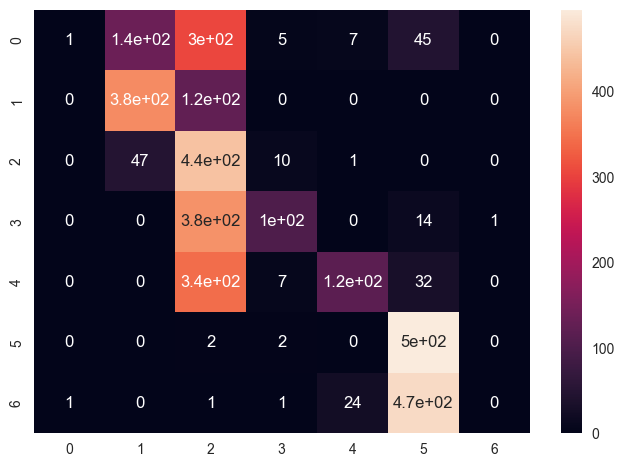

In [15]:
matrix = confusion_matrix(result_best_model['Consumer_type'], result_best_model['prediction_label'])
sns.heatmap(matrix, annot=True)

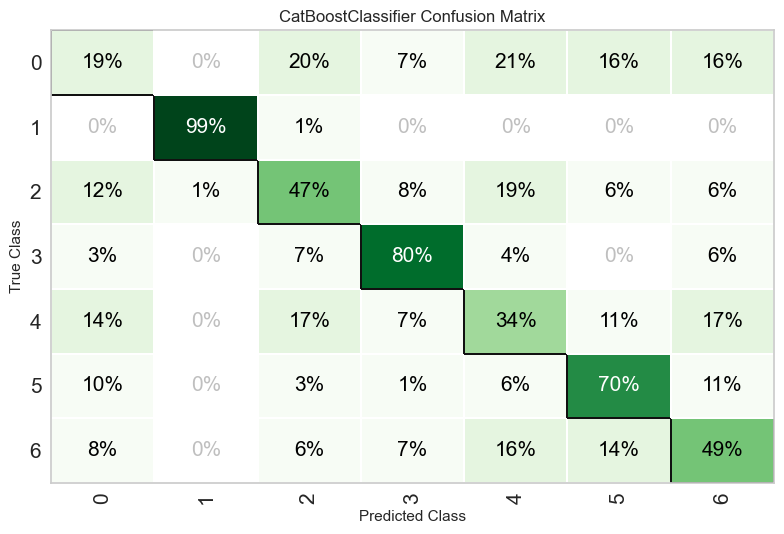

In [16]:
plot_model(best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [17]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5682,0.8713,0.5682,0.5528,0.5583,0.4962,0.4970
1,0.5675,0.8709,0.5675,0.5510,0.5566,0.4954,0.4965
2,0.5671,0.8704,0.5671,0.5507,0.5564,0.4949,0.4959
3,0.5665,0.8699,0.5665,0.5497,0.5558,0.4942,0.4951
4,0.5650,0.8699,0.5650,0.5481,0.5542,0.4924,0.4934
5,0.5679,0.8701,0.5679,0.5520,0.5577,0.4958,0.4967
6,0.5663,0.8703,0.5663,0.5497,0.5557,0.4940,0.4949
7,0.5682,0.8706,0.5682,0.5517,0.5576,0.4962,0.4971
8,0.5655,0.8708,0.5655,0.5502,0.5556,0.4930,0.4939


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


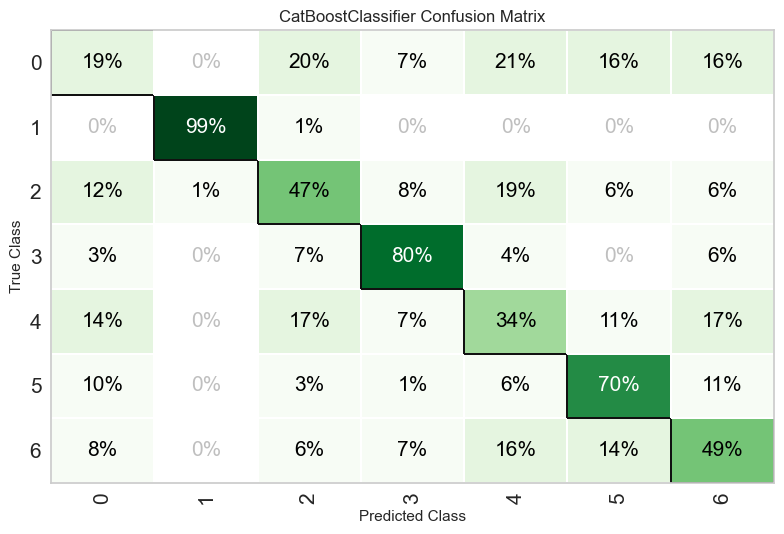

In [18]:
plot_model(tuned_best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [19]:
result_tuned_best_model = predict_model(tuned_best_model, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.4383,0.8489,0.4383,0.5005,0.3508,0.3447,0.3898


<AxesSubplot: >

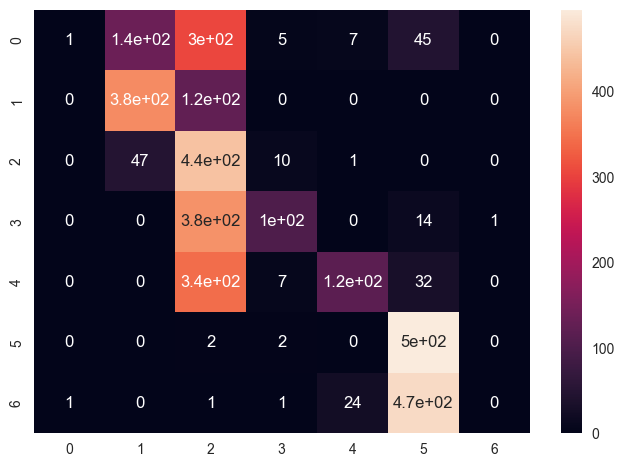

In [20]:
matrix = confusion_matrix(result_tuned_best_model['Consumer_type'], result_tuned_best_model['prediction_label'])
sns.heatmap(matrix, annot=True)

In [21]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
# save_model(best_model, 'best_model')
# save_model(tuned_best_model, 'tuned_best_model')

In [32]:
competition = pd.read_csv("competition.csv")

In [33]:
competition.head()

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3


In [35]:
result_competition = predict_model(best_model, data=competition)

result_competition = result_competition.rename(columns={'prediction_label': 'Consumer_type'})

In [36]:
result_competition.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type,prediction_score
0,2013,1,1,VENX08444954462680,Installation_zone 1,industrial,0.9261
1,2013,1,2,GRXC33020746550125,Installation_zone 1,industrial,0.9166
2,2013,1,1,FCGQ19814303536339,Installation_zone 1,industrial,0.9261
3,2013,1,5,EQKL85694875580467,Installation_zone 3,industrial,0.7723
4,2013,1,14,KCXW91343862250032,Installation_zone 3,industrial,0.5565


Text(0.5, 1.0, 'Count of Consumer_type')

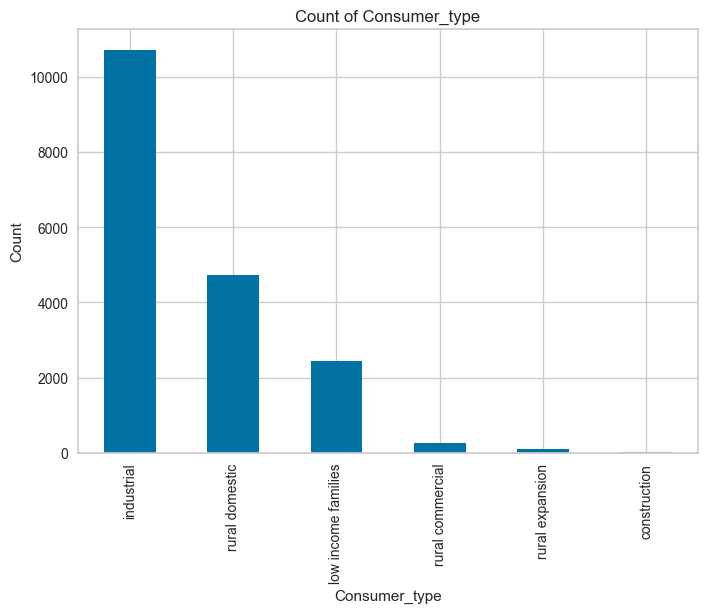

In [37]:
result_competition['Consumer_type'].value_counts().plot(kind='bar')

plt.xlabel('Consumer_type')
plt.ylabel('Count')
plt.title('Count of Consumer_type')

In [38]:
result_competition.to_csv('competition_v2', index=False)

In [40]:
result_competition = predict_model(tuned_best_model, data=competition)

result_competition = result_competition.rename(columns={'prediction_label': 'Consumer_type'})

In [41]:
result_competition.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type,prediction_score
0,2013,1,1,VENX08444954462680,Installation_zone 1,industrial,0.9261
1,2013,1,2,GRXC33020746550125,Installation_zone 1,industrial,0.9166
2,2013,1,1,FCGQ19814303536339,Installation_zone 1,industrial,0.9261
3,2013,1,5,EQKL85694875580467,Installation_zone 3,industrial,0.7723
4,2013,1,14,KCXW91343862250032,Installation_zone 3,industrial,0.5565


Text(0.5, 1.0, 'Count of Consumer_type')

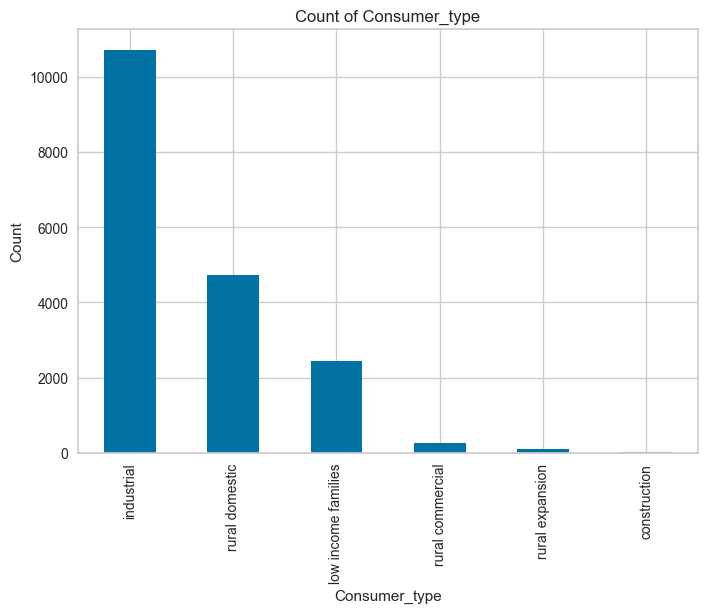

In [42]:
result_competition['Consumer_type'].value_counts().plot(kind='bar')

plt.xlabel('Consumer_type')
plt.ylabel('Count')
plt.title('Count of Consumer_type')